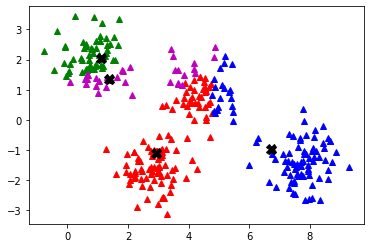

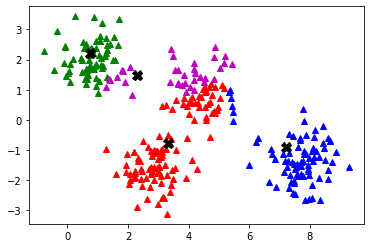

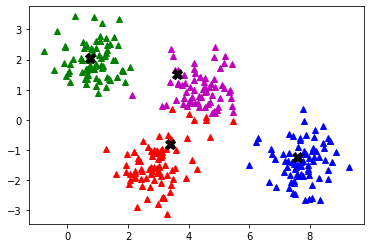

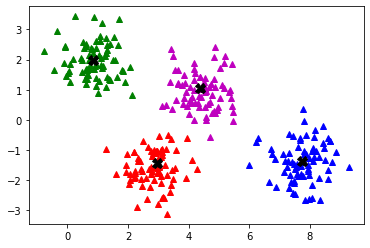

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
cd_data = pd.read_csv('cdata.csv')
###first random 4--points
forsamlple=[]
for i in cd_data.index:
    forsamlple.append(i)
select=rd.sample(forsamlple,4)
cd_data.loc[select[0]][['x','y']]
compare=pd.DataFrame({'1':[cd_data.loc[select[0]][['x','y']]],'2':[cd_data.loc[select[1]][['x','y']]],'3':[cd_data.loc[select[2]][['x','y']]],'4':[cd_data.loc[select[3]][['x','y']]]})

##use min to append clust_bool
clust_bool=[]
for i in range(len(cd_data)):
    midlist=[]
    for j in compare:
        #print(cd_data.loc[i]['x'])
        #print(compare[j][0]['x'])
        midlist.append((cd_data.loc[i]['x']-compare[j][0]['x'])**2+(cd_data.loc[i]['y']-compare[j][0]['y'])**2)
    #print('---',midlist)
    clust_bool.append(midlist.index(min(midlist))+1)
    #print('**',clust_bool[i])
    del midlist
###
togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
one=togroup.groupby('clust_bool').get_group(1) 
two=togroup.groupby('clust_bool').get_group(2)
thr=togroup.groupby('clust_bool').get_group(3)
fo=togroup.groupby('clust_bool').get_group(4)
plt.plot(one['x'],one['y'], 'g^',two['x'],two['y'], 'r^',thr['x'],thr['y'], 'b^',fo['x'],fo['y'], 'm^',)
for i in select:
    plt.plot(cd_data['x'][i],cd_data['y'][i],'kX',markersize=10)
plt.show()   
##fist readjust the centroid and append to compare
ad=pd.DataFrame({'1':[one.mean()[['x','y']]],'2':[two.mean()[['x','y']]],'3':[thr.mean()[['x','y']]],'4':[fo.mean()[['x','y']]]},index=[1])
compare=compare.append(ad)
onedis=(compare['1'][0]['x']-compare['1'][1]['x'])**2+(compare['1'][0]['y']-compare['1'][1]['y'])**2
twodis=(compare['2'][0]['x']-compare['2'][1]['x'])**2+(compare['2'][0]['y']-compare['2'][1]['y'])**2
thrdis=(compare['3'][0]['x']-compare['3'][1]['x'])**2+(compare['3'][0]['y']-compare['3'][1]['y'])**2
fodis=(compare['4'][0]['x']-compare['4'][1]['x'])**2+(compare['4'][0]['y']-compare['4'][1]['y'])**2
###
del clust_bool
comparezero=0
while(onedis!=0 and twodis!=0 and thrdis!=0 and fodis!=0 ):
    clust_bool=[]
    del togroup
    del ad
    comparezero=comparezero+1
    for i in range(len(cd_data)):
        midlist=[]
        for j in compare:
            midlist.append((cd_data.loc[i]['x']-compare[j][comparezero]['x'])**2+(cd_data.loc[i]['y']-compare[j][comparezero]['y'])**2)
        clust_bool.append(midlist.index(min(midlist))+1)
        del midlist
    togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
    one=togroup.groupby('clust_bool').get_group(1) 
    two=togroup.groupby('clust_bool').get_group(2)
    thr=togroup.groupby('clust_bool').get_group(3)
    fo=togroup.groupby('clust_bool').get_group(4)
    plt.plot(one['x'],one['y'], 'g^',two['x'],two['y'], 'r^',thr['x'],thr['y'], 'b^',fo['x'],fo['y'], 'm^',)
    for i in compare:
        plt.plot(compare[i][comparezero]['x'],compare[i][comparezero]['y'],'kX',markersize=10)
    plt.show() 
    
    ad=pd.DataFrame({'1':[one.mean()[['x','y']]],'2':[two.mean()[['x','y']]],'3':[thr.mean()[['x','y']]],'4':[fo.mean()[['x','y']]]},index=[comparezero+1])
    compare=compare.append(ad)
    onedis=(compare['1'][comparezero]['x']-compare['1'][comparezero+1]['x'])**2+(compare['1'][comparezero]['y']-compare['1'][comparezero+1]['y'])**2
    twodis=(compare['2'][comparezero]['x']-compare['2'][comparezero+1]['x'])**2+(compare['2'][comparezero]['y']-compare['2'][comparezero+1]['y'])**2
    thrdis=(compare['3'][comparezero]['x']-compare['3'][comparezero+1]['x'])**2+(compare['3'][comparezero]['y']-compare['3'][comparezero+1]['y'])**2
    fodis=(compare['4'][comparezero]['x']-compare['4'][comparezero+1]['x'])**2+(compare['4'][comparezero]['y']-compare['4'][comparezero+1]['y'])**2
    del clust_bool


Text(0, 0.5, 'sum of square error')

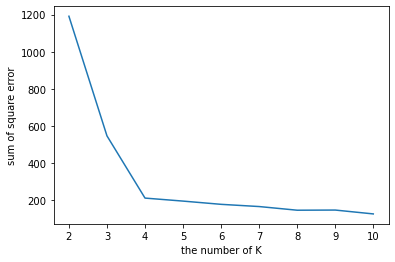

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
cd_data = pd.read_csv('cdata.csv')
forsamlple=[]
dictxy={}
for i in cd_data.index:
    forsamlple.append(i)
for n in range(2,11):
    ###first random
    select=rd.sample(forsamlple,n)
    cenlist=[]
    tocenlist=[]
    for i in select:
        tocenlist.append(cd_data.loc[i][['x','y']])
    cenlist.append(tocenlist)
    ##use min to append clust_bool
    clust_bool=[]
    for i in range(len(cd_data)):
        midlist=[]
        for j in range(len(cenlist[0])):
           #print(cd_data.loc[i]['x'])
           #print(compare[j][0]['x'])
            midlist.append((cd_data.loc[i]['x']-cenlist[0][j]['x'])**2+(cd_data.loc[i]['y']-cenlist[0][j]['y'])**2)
    #print('---',midlist)
        clust_bool.append(midlist.index(min(midlist))+1)
    togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
    grouplist=[]
    for i in range(n):
        grouplist.append(togroup.groupby('clust_bool').get_group(i+1))
    ##fist readjust the centroid and append to compare
    tocenlist=[]
    for i in range(len(grouplist)):
        tocenlist.append(grouplist[i].mean()[['x','y']])
    cenlist.append(tocenlist)
    distance=0
    for i in range(len(grouplist)):
        distance=distance+((cenlist[0][i]['x']-cenlist[1][i]['x'])**2+(cenlist[0][i]['y']-cenlist[1][i]['y'])**2)    
    ####
    comparezero=0
    while(distance!=0):
        clust_bool=[]
        #del togroup,grouplist,tocenlist
        comparezero=comparezero+1
        for i in range(len(cd_data)):
            midlist=[]
            for j in range(len(cenlist[comparezero])):
                midlist.append((cd_data.loc[i]['x']-cenlist[comparezero][j]['x'])**2+(cd_data.loc[i]['y']-cenlist[comparezero][j]['y'])**2)
            clust_bool.append(midlist.index(min(midlist))+1)
            del midlist
        togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
        grouplist=[]
        for i in range(n):
            grouplist.append(togroup.groupby('clust_bool').get_group(i+1))
        tocenlist=[]
        for i in range(len(grouplist)):
            tocenlist.append(grouplist[i].mean()[['x','y']])
        cenlist.append(tocenlist)
       # for i in tocenlist:
       #     plt.plot(i['x'],i['y'],'kX',markersize=10)
       # plt.show()
        distance=0
        for i in range(len(grouplist)):
            distance=distance+((cenlist[comparezero][i]['x']-cenlist[comparezero+1][i]['x'])**2+(cenlist[comparezero][i]['y']-cenlist[comparezero+1][i]['y'])**2)
    #print('---',tocenlist)
    #grouplist=[]
    sse=0
    for i in range(n):
        for j in grouplist[i].index:
            sse=sse+((cd_data.loc[j]['x']-tocenlist[i]['x'])**2+(cd_data.loc[j]['y']-tocenlist[i]['y'])**2)
    dictxy[n]=sse
plt.plot(dictxy.keys(),dictxy.values())
plt.xlabel('the number of K')
plt.ylabel('sum of square error')
            

(-1.0, 10.0, 100.0, 170.0)

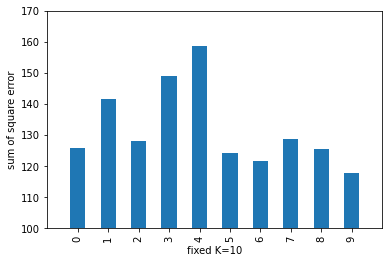

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
cd_data = pd.read_csv('cdata.csv')
forsamlple=[]
dictxy={}
for i in cd_data.index:
    forsamlple.append(i)
for n in range(10,11):
    for time in range(10):
        ###first random
        select=rd.sample(forsamlple,n)
        cenlist=[]
        tocenlist=[]
        for i in select:
            tocenlist.append(cd_data.loc[i][['x','y']])
        cenlist.append(tocenlist)
        ##use min to append clust_bool
        clust_bool=[]
        for i in range(len(cd_data)):
            midlist=[]
            for j in range(len(cenlist[0])):
                midlist.append((cd_data.loc[i]['x']-cenlist[0][j]['x'])**2+(cd_data.loc[i]['y']-cenlist[0][j]['y'])**2)
            clust_bool.append(midlist.index(min(midlist))+1)
        togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
        grouplist=[]
        for i in range(n):
            grouplist.append(togroup.groupby('clust_bool').get_group(i+1))
        ##fist readjust the centroid and append to compare
        tocenlist=[]
        for i in range(len(grouplist)):
            tocenlist.append(grouplist[i].mean()[['x','y']])
        cenlist.append(tocenlist)
        distance=0
        for i in range(len(grouplist)):
            distance=distance+((cenlist[0][i]['x']-cenlist[1][i]['x'])**2+(cenlist[0][i]['y']-cenlist[1][i]['y'])**2)    
        ####
        comparezero=0
        while(distance!=0):
            clust_bool=[]
            #del togroup,grouplist,tocenlist
            comparezero=comparezero+1
            for i in range(len(cd_data)):
                midlist=[]
                for j in range(len(cenlist[comparezero])):
                    midlist.append((cd_data.loc[i]['x']-cenlist[comparezero][j]['x'])**2+(cd_data.loc[i]['y']-cenlist[comparezero][j]['y'])**2)
                clust_bool.append(midlist.index(min(midlist))+1)
            togroup=pd.DataFrame({'x':cd_data['x'],'y':cd_data['y'],'clust_bool':clust_bool})
            grouplist=[]
            for i in range(n):
                grouplist.append(togroup.groupby('clust_bool').get_group(i+1))
            tocenlist=[]
            for i in range(len(grouplist)):
                tocenlist.append(grouplist[i].mean()[['x','y']])
            cenlist.append(tocenlist)
            distance=0
            for i in range(len(grouplist)):
                distance=distance+((cenlist[comparezero][i]['x']-cenlist[comparezero+1][i]['x'])**2+(cenlist[comparezero][i]['y']-cenlist[comparezero+1][i]['y'])**2)
        sse=0
        for i in range(n):
            for j in grouplist[i].index:
                sse=sse+((cd_data.loc[j]['x']-tocenlist[i]['x'])**2+(cd_data.loc[j]['y']-tocenlist[i]['y'])**2)
        dictxy[time]=sse
show = pd.Series(dictxy.values(),dictxy.keys())
show.plot(kind='bar')
plt.xlabel('fixed K=10')
plt.ylabel('sum of square error')
plt.axis([-1,10,100,170])